# Unsupervised Learning Techniques

So far we have seen machine learning applications for supervised learning where the Y or dependent variable is known. 

Unsupervised means we have input features X but we do not have labels y. 

Lets think of a scenario where you need to identify defects in manufacturing equipment. So you need to build a model to do this. But you do not have any labels. You could manually label millions of photos or just label a subset of the data.

However what if we could just create a algorithmn  to exploit unlabeled data without needing humans to label every picture? 

This is where unsupervished learning techniques shines. 

Here are some of the algorithmns we will see in this chapter:

*Clustering* the goal is to group similar instances together into clusters. It is great for data analysis, customer segmentation, recommender systems, search engines, images segmentation, semi-superivised learning, dimensionality reductions and more. 

*Anomaly detection* the objective is to learn what "normal" data looks like, and then use that to detect abnormal instances, such as defective items on a production line or a new trend in time series. 

*Density estimation* This is the task of estimating the probability density function(PDF) of the random process that generated the dataset. Density estimation is commonly used for anomaly detection: instances located in very low-density regions are likely to be anomalies. It is also useful for data analysis and visualization. 

## Clustering

Clustering is when we identify similar instances and assigning them to clusters or groups of similar instances. 

In [1]:
#Importing libraries
# Scikit-Learn ≥0.20 is required
import sklearn
#assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
#Using the Iris dataset to show the differences between Classification and clustering
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

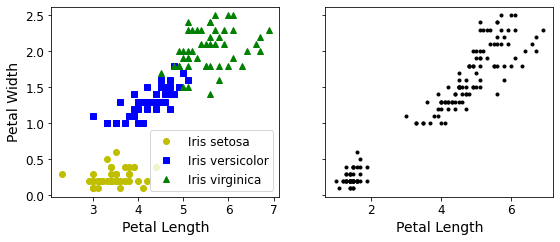

In [4]:
plt.figure(figsize=(9,3.5))
plt.subplot(121)
plt.plot(X[y==0,1],X[y==0,3],"yo",label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")

plt.xlabel("Petal Length",fontsize=14)
plt.ylabel("Petal Width",fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:,2],X[:,3],c="k",marker=".")
plt.xlabel("Petal Length",fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

In the above we can see the left uses classification and it is easy to figure the bottom Iris setosa. THe top right ones are harder to identify but we are using just petal length and petal width. 

Here are some of the other useful applications:

* Customer segmentation
* Data Analysis
* Dimensionality Reduction Technique
* Anomaly detection
* Semi-supervished learning
* Search engines
* Segment an image

### K-MEANs clustering

K-MEANs lets us cluster using a simple algorithm. The way it works is you are given the centroids you then can easily label them in the dataset by assinging each of them to the cluster who centroid is closer. 

If you have the labels and centroids it would have been easier. 

To do this we can start placing randoms centroids  and by picking K(number of clusters) randomly, then label the instances, update the centroids. It keeps updating until the centroids stop moving and meeti. 

In [5]:
from sklearn.datasets import make_blobs

In [6]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [7]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [8]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

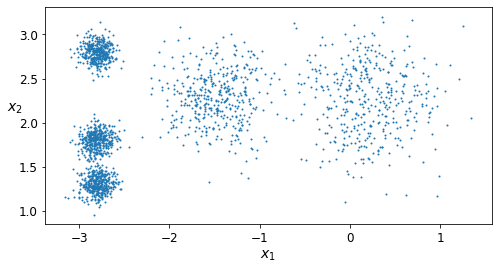

In [9]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
#save_fig("blobs_plot")
plt.show()

We can see above that the optimal K number is 5 since we can see a clear pattern. 

In [10]:
#Using K-MEANs
from sklearn.cluster import KMeans

In [11]:
k = 5
kmeans = KMeans(n_clusters=k,random_state=42)
y_pred = kmeans.fit_predict(X)

In [12]:
y_pred

array([0, 4, 1, ..., 2, 1, 4], dtype=int32)

In [13]:
np.unique(y_pred) # 5 potential clusters

array([0, 1, 2, 3, 4], dtype=int32)

In [14]:
y_pred is kmeans.labels_

True

In [15]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [16]:
kmeans.labels_

array([0, 4, 1, ..., 2, 1, 4], dtype=int32)

In [17]:
#Predicting new labels and plotting decision boundary
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

In [18]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

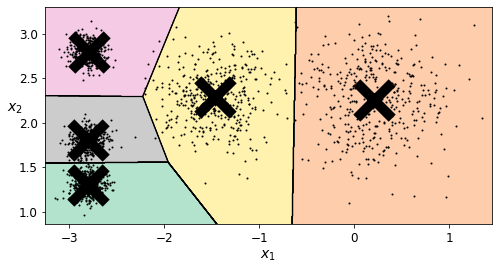

In [19]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
#save_fig("voronoi_plot")
plt.show()

We can see where the decision boundaries are on but there are some errors especially on the decision boundary. Above we used *Hard Clustering* where we assign a value per instance however we can use *Soft Clustering* where you assign a instance score per instance. The score can be the distance between the instance and the enctroid. 

In KMeans the transform method shows the distance between each instance to every centroid. 

In [20]:
kmeans.transform(X_new)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

In [21]:
#Measuring euclidian distance between each instance and centroid using numpu
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

What the above shows is how far the distance for each instance is from the centroid. So the first instance is 2.886 from the centroid and 0.3299 is the second instance. 

Using KMeans we can transform a high dimensional dataset you can transform it this way, you end up with a k-dimensional dataset. THis can be very efficient nonlinear dimensionality reduction technique. 

The K-Means algorithm is one of the fastest clustering algorithms, but also one of the simplest:

First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.

Repeat until convergence (i.e., until the centroids stop moving):
Assign each instance to the closest centroid.

Update the centroids to be the mean of the instances that are assigned to them.

The KMeans class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set init="random", n_init=1and algorithm="full". These hyperparameters will be explained below.

Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

In [22]:
kmeans_iter1 = KMeans(n_clusters=5,init="random",n_init=1,algorithm="full",max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5,init="random",n_init=1,algorithm="full",max_iter=1, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5,init="random",n_init=1,algorithm="full",max_iter=1, random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=1, n_clusters=5, n_init=1,
       random_state=1)

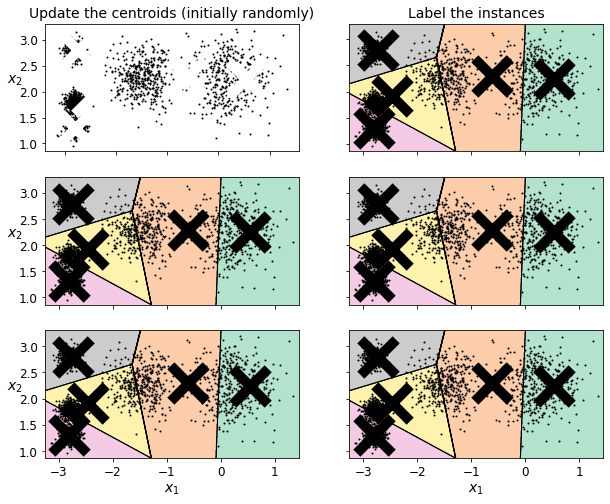

In [23]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

#save_fig("kmeans_algorithm_plot")
plt.show()

We can see that in the first image we start with zero and we list the clusters randomnly but soon we start to converge. And the clusters start to collect the instances into their group. 

Cluster will converge but that does not mean it is the right convergation. 

#### Computational complexity

For KMeans it is generally linear with regard to the number of instances *m*, the number of clusters*k* and the number of dimensions *n*. This is only true when there is a clustering structure. The complexity can increase expontentially with the number of instances if there is no clustering structure. 

****

So how do you determine where to set the centroids beside random. Well if after visualzation you have some idea you can use the init parameter in KMeans to start the centroids thus saving time.

Another option is is to run the algorithm multiple times with different random initializations and keep the solution. SKlearn uses 10 as the default parameter but you can set this to anything. For example 20 so the algortithm runs 20 times. 

So how do you evaluate the performance and decide which is the best number. Wwell there is a performance metric called *inertia*.  Which is the mean squared distance between each instances and its closest centroid. This means KMEANS runs until it reaches the lowest possible inertia. 

In [24]:
kmeans.inertia_

211.5985372581683

In [25]:
kmeans.score(X)

-211.5985372581683


## K-Means++

Instead of initializing the centroids entirely randomly, it is preferable to initialize them using the following algorithm, proposed in a 2006 paper(http://ilpubs.stanford.edu:8090/778/) by David Arthur and Sergei Vassilvitskii:

Take one centroid $c_1$, chosen uniformly at random from the dataset.
Take a new center $c_i$, choosing an instance $\mathbf{x}_i$ with probability: $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ where $D(\mathbf{x}_i)$ is the distance between the instance $\mathbf{x}_i$ and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.
Repeat the previous step until all $k$ centroids have been chosen.
The rest of the K-Means++ algorithm is just regular K-Means. With this initialization, the K-Means algorithm is much less likely to converge to a suboptimal solution, so it is possible to reduce n_init considerably. Most of the time, this largely compensates for the additional complexity of the initialization process.

To set the initialization to K-Means++, simply set init="k-means++" (this is actually the default):

In [26]:
KMeans()

KMeans()

In [27]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.62337889822362

## Accelerated K-Means and mini-batch KMeans

You can execute KMeans using mini matches which means that you are moving the centroids slightly at each iteration. 

The K-Means algorithm can be significantly accelerated by avoiding many unnecessary distance calculations: this is achieved by exploiting the triangle inequality (given three points A, B and C, the distance AC is always such that AC ≤ AB + BC) and by keeping track of lower and upper bounds for distances between instances and centroids (see this 2003 paper by Charles Elkan for more details). Paper link: https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf

To use Elkan's variant of K-Means, just set algorithm="elkan". Note that it does not support sparse data, so by default, Scikit-Learn uses "elkan" for dense data, and "full" (the regular K-Means algorithm) for sparse data.

In [28]:
#Accelerated 
%timeit -n 50 KMeans(algorithm="elkan").fit(X)

115 ms ± 22.6 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [29]:
%timeit -n 50 KMeans(algorithm="full").fit(X)

85.1 ms ± 5.73 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [30]:
from sklearn.cluster import MiniBatchKMeans

In [31]:
#You can also use mini batches for speed
minibatches_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatches_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [32]:
minibatches_kmeans.inertia_

211.93186531476786

Kmean minibatches is generally musch faster than K but the inertia gets slightly worse as K increases. 

### Finding the optimal number of clusters

You could think that choosing the number of clusters with the lowest inertia is the best option but you will see that by increasing the number of clusters the interia gets lower since there are more centroids so more points get closer to their nearest centroid. 

In [33]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

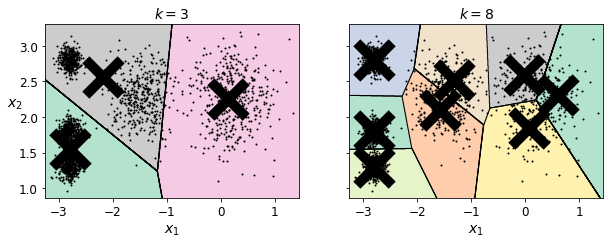

In [34]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
#save_fig("bad_n_clusters_plot")
plt.show()

We see in the above that adding the clusters to 8 does decrease interia because there are more points. 

In [35]:
#Using the elbow method
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

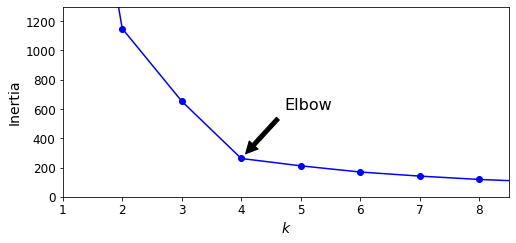

In [36]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
#save_fig("inertia_vs_k_plot")
plt.show()

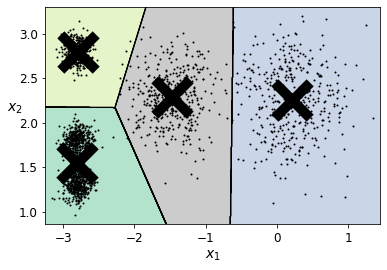

In [37]:
#Plotting decision boundaries
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

We see using this method called the elbow method This inflexion point shows that the inertia drops very quickly as we increase K up to 4 and it keeps decreases as we increase K. So this suggests that 4 is a good number of clusters. 

A slightly more precise approach is called the *silhouette score* which is the *silhouette coefficient* over all the instances. An instances's silhouette coefficient  is equal to (b - a) / max(a,b) where a is the mean distance to the other instances in the same cluster and b is the mean nearest cluster distance( the mean distance to the instances of the next closest cluster, defined as the one that minimizes b, excluding the instance's own cluster. 

The sillhouette coefficient can vary between -1 and +1. A instance closer to +1 means that the instance is well inside its own cluster and far from other clusters while a coefficient close to 0 means that is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

Sklearn has a way to compute the silhouetter score

In [38]:
from sklearn.metrics import silhouette_score

In [39]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [40]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

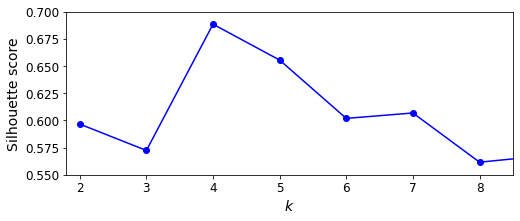

In [41]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
#save_fig("silhouette_score_vs_k_plot")
plt.show()

As you can see 4 is a very good visualization but 5 is quite good as well better than 6 or 7. 

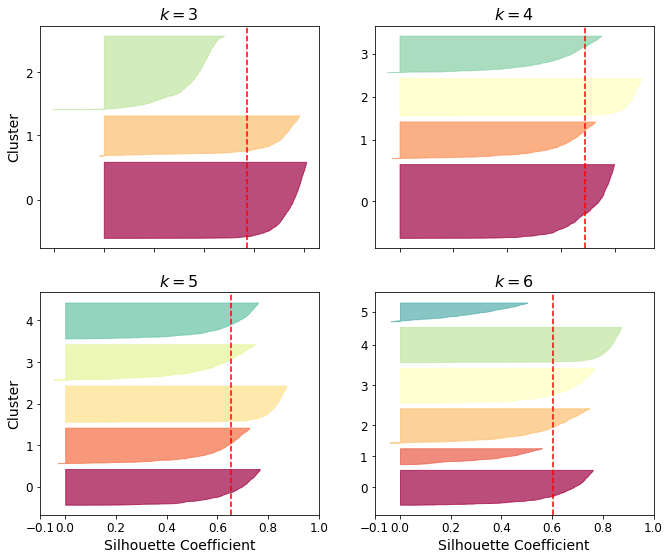

In [42]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

#save_fig("silhouette_analysis_plot")
plt.show()

We see above that the dashed red line represents the score and it is 0.7

### Limits of KMeans

*Always scale your input features before you run kmeans

KMmeans does not perform very well when the following happens:

* Clusters have different densities
* Nonspherical shapes 

In [43]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

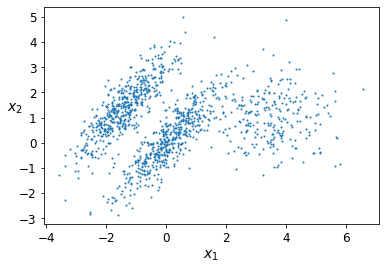

In [44]:
plot_clusters(X)

In [45]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

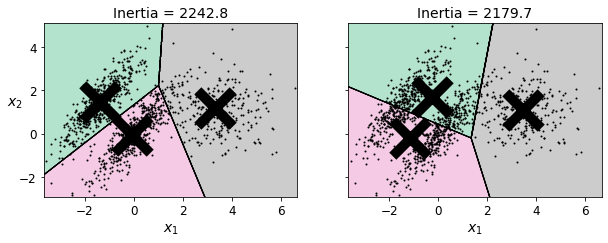

In [46]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

#save_fig("bad_kmeans_plot")
plt.show()

We can see that the above images do not create a perfect solution but if you compare it to the raw data the middle cluster is still not great and you can easily say it belongs to another cluster. 

## Using Clustering for Image Segmentation

Image segmentation is the task of partitioning an image into multiple segments. In *semantic segmentation*, all pixels that are part of the same object type get assigned to the same segment. 

An example of this is building a self driving car program. The image contains a series of pixels that can identify a car or a pedestrian. What you can do is cluster all pixels based on color for example that identify pedestrians. And the same for the cars pixels using clusters. 

In [47]:
#Example using matplotlib
import urllib
# Download the ladybug image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7f66b8196b50>)

In [48]:
from matplotlib.image import imread

In [49]:
image = imread(os.path.join("images","unsupervised_learning","ladybug.png"))
image.shape

(533, 800, 3)

Above the first value is the height, the second value is the width and the third one is the number of color channels like red, green and blue. 

In [50]:
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=9).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

What we did with the first line is shape everything into a long array. We use KMeans to cluster all the colors together perhaps we will find some all green clusters or red etc. Then we re-shape everything back into a image.

In [51]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

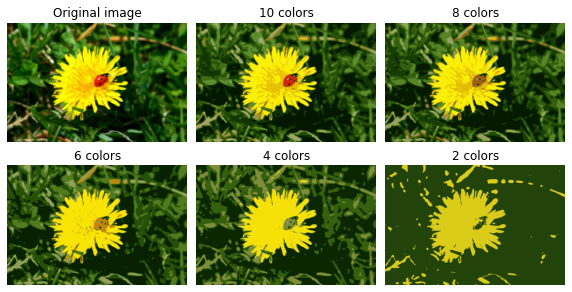

In [52]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    #print(idx)
    #print(n_clusters)
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

#save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

We see when we use less than 8 clusters we struggle to identify the red color. This is because KMeans prefers clusters of similar sizes and the red of the lady bug is considerably smaller.  So it suggests we want to have a cluster of 8 or greater. It seems 10 colors is quite size. 

## Using Clustering for Preprocessing

As mentioned before clustering can be efficient for dimensionality reduction, in particular as a preprocessing step before a supervised learning algorithm. 

Below we will illustrate this using grayscale images.

In [53]:
from sklearn.datasets import load_digits

In [54]:
X_digits, y_digits = load_digits(return_X_y=True)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [59]:
log_reg.score(X_test, y_test)

0.9688888888888889

Lets add a preprocessing step before

In [60]:
from sklearn.pipeline import Pipeline

In [61]:
pipeline = Pipeline([("kmeans",KMeans(n_clusters=50)),
                     ("log_reg",LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [62]:
pipeline.score(X_test,y_test)

0.98

It performed considerably better. 

In [63]:
1 - (1 - 0.977777) / (1 - 0.968888) # almost a 30% improvement

0.28570969400874346

In [64]:
#Using grid search to improve the work
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = dict(kmeans__n_clusters=range(2, 10))## Change to 100
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    8.1s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 10)}, verbose=2)

In [66]:
grid_clf.best_params_

{'kmeans__n_clusters': 9}

In [67]:
grid_clf.score(X_test,y_test)

0.8977777777777778

## User clustering for semi-supervised learning

This example is when you use unsupervised techniques to do labeling of unlabelled instances. 

In [68]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

In [69]:
k = 50

In [70]:
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

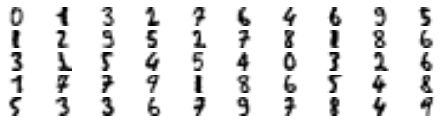

In [71]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

#save_fig("representative_images_diagram", tight_layout=False)
plt.show()

In [72]:
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 8, 8, 6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

In [73]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9133333333333333

Notice how now we have improved to 91% but we had to label all images which can take a long time. Now we will propagated labels to other instances thus not having to manually do it. This is called *Label Propagation*. 

In [74]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [75]:
y_train_propagated

array([5, 2, 0, ..., 8, 7, 1], dtype=int32)

In [76]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [77]:
log_reg.score(X_test, y_test)

0.9333333333333333

We made an improvement compared to before. Now we will propagate only the 20th percentile.

In [78]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [79]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [80]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [81]:
log_reg.score(X_test, y_test)

0.9133333333333333

# DBSCAN

This algorithmn defines clusters as continuous regions of high density. Below is the explanation:

* For each instance the algorithm counts how many instances are located within a small distance epsilon from it. THis region is called the instance's epsilon neighborhood. 

* If an instance has at least min_samples instances in its epsilon-neighborhood(including itself), then it is considered a *core instance*. In other words, core instances are those that are located in dense regions. 

* All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instances; therefore, a long sequence of neighboring core instances from a single cluster. 

* Any instance that is not a core instance and does not hae one its neighborhood is considered an anomaly. 

the algorithm works if all clusters are dense enough and if they are well separated by low density regions. 

In [82]:
from sklearn.datasets import make_moons

In [83]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [84]:
from sklearn.cluster import DBSCAN

In [85]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [86]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

Clusters are -1  are considered anomalies

In [87]:
len(dbscan.core_sample_indices_)

808

In [88]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [89]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [90]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [91]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [92]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

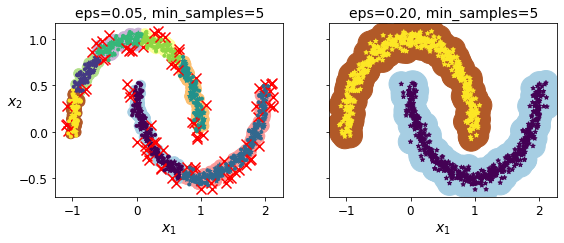

In [93]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

#save_fig("dbscan_plot")
plt.show()

We see that we have a lot anamolies  and 7 different clusters. But we increase the eps value we see we start to define the clusters better. DBSCAN does not actually have a predict method so that it assign which cluster a new instance belongs too. But you can combine it with a classification algorithm. 

This allows us to estimate the probablity to each cluster.

In [94]:
dbscan = dbscan2

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [97]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [98]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

We trained the classifier on the core instances but we can train on all instances. We can also add a decision boundary. 

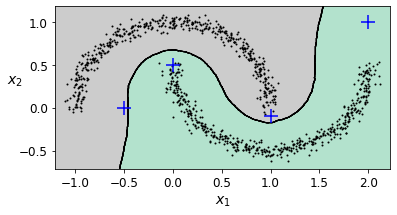

In [99]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
#save_fig("cluster_classification_plot")
plt.show()

# Other Clustering Algorithmns

Sklearn implements several clustering algorithmns:

* Agglomerative clustering - a hiearchy of clusters is built from the bottom up. 

* BIRCH - The BIRCH (Balanced Iterative Reducing and Clustering using Hiearchies) it is built for large dataset and it can be faster than batch K-Means with similar results. During training it builds a tree structure containing just enough information to quickly assign each new instance to a cluster, without having to store all the instances in the tree: this approach allows it to use limited memory, while handling huge datasets. 

* Mean-Shift - this algorithm starts by placing a circle centered on each instance; then for each circle it computes the mean of all the instances located within it, and it shifts the circle so that it is centered on the mean.  Next, it iterates this mean-shifting step until all the circles stop moving(until each of them is centered on the mean of the instances it contains). Mean-Shift shifts the circles in the direction of higher density, until each of them has found a local density maximum. Finally, all the instances whose circles have settled in the same place are assigned to the same cluster. 

* Affinity propagation - this algorithm uses a voting system, where instances vote for similar instances to be their representatives, and once the algorithm converges, each representative and its voters form a cluster.  Affinity propagation can detect any number of clusters of different sizes, but it has a high complexity of Big O m^2

* Spectral clustering - This algorithm takes a similar matrix between the instances and creates a low dimensional embedding from it then it uses it another clustering algorithm in this low dimensional space. 

## Gaussian Mixtures

A Gaussian mixture model is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown.  All instances generated from a single Gaussian distribution form a cluster that looks likea  ellipsoid. Each cluster can have a different shape, size, density and orientation. 

In [100]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [101]:
from sklearn.mixture import GaussianMixture

In [102]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [103]:
gm.weights_

array([0.39054348, 0.2093669 , 0.40008962])

In [104]:
gm.means_

array([[ 0.05224874,  0.07631976],
       [ 3.40196611,  1.05838748],
       [-1.40754214,  1.42716873]])

In [105]:
gm.covariances_

array([[[ 0.6890309 ,  0.79717058],
        [ 0.79717058,  1.21367348]],

       [[ 1.14296668, -0.03114176],
        [-0.03114176,  0.9545003 ]],

       [[ 0.63496849,  0.7298512 ],
        [ 0.7298512 ,  1.16112807]]])

In [106]:
gm.converged_

True

In [107]:
gm.n_iter_

4

Now this tell us that the algorithmn converged at 4 iterations. Now we will make a prediction using hard clustering and soft.

In [108]:
gm.predict(X)

array([0, 0, 2, ..., 1, 1, 1])

In [109]:
gm.predict_proba(X)

array([[9.77227791e-01, 2.27715290e-02, 6.79898914e-07],
       [9.83288385e-01, 1.60345103e-02, 6.77104389e-04],
       [7.51824662e-05, 1.90251273e-06, 9.99922915e-01],
       ...,
       [4.35053542e-07, 9.99999565e-01, 2.17938894e-26],
       [5.27837047e-16, 1.00000000e+00, 1.50679490e-41],
       [2.32355608e-15, 1.00000000e+00, 8.21915701e-41]])

In [110]:
#Now we can sample new instances 
X_new, y_new = gm.sample(6)
X_new

array([[-0.8690223 , -0.32680051],
       [ 0.29945755,  0.2841852 ],
       [ 1.85027284,  2.06556913],
       [ 3.98260019,  1.50041446],
       [ 3.82006355,  0.53143606],
       [-1.04015332,  0.7864941 ]])

In [111]:
y_new

array([0, 0, 1, 1, 1, 2])

We can estimate the distnance for each instance using the probability density function. 

In [112]:
gm.score_samples(X)

array([-2.60674489, -3.57074133, -3.33007348, ..., -3.51379355,
       -4.39643283, -3.8055665 ])

In [113]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999271592

In [114]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

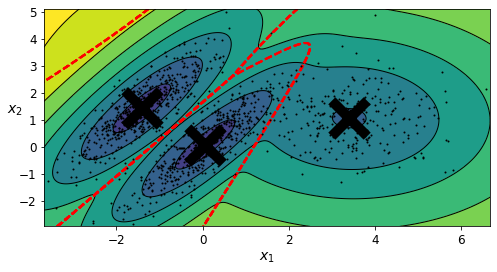

In [115]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

#save_fig("gaussian_mixtures_plot")
plt.show()


You can impose constraints on the covariance matrices that the algorithm looks for by setting the covariance_type hyperparameter:

"full" (default): no constraint, all clusters can take on any ellipsoidal shape of any size.

"tied": all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).

"spherical": all clusters must be spherical, but they can have different diameters (i.e., different variances).

"diag": clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal).

### Anomaly detection using Gaussian Mixtures

Anomaly detection is the task of detecting instances that deviate strongly from the norm. These instances are called anomalies or outliers and normal instances are called inliers. 

Anomaly detection is useful in a wide variety of applications such as fraud detection or detecting defective products in manufacturing or removing outliers. 

How does this work with Guassian mixtures?

- It first will classify any instance in low-density regions as a anomaly. You can define the density threshold. 


In [116]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4) #Change density for threshold
anomalies = X[densities < density_threshold]

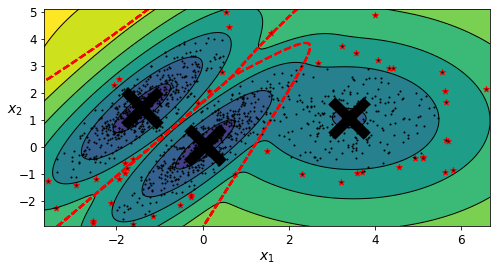

In [117]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

#save_fig("mixture_anomaly_detection_plot")
plt.show()

The red stars are anomalies which are in low density areas. Chaning the threshold as we do in the red line will impact this. 

There is also the concept of *novelty detection* which is when we identify a anomaly but on a clean dataset this mean a dataset with no outliers. Often you will use anomaly detection to remove outliers. 

This is because gaussians mixture models will try to fit all the data. 

### Selecting the number of Clusters

In K-Means you can user inertia or silhoutte score to find the right number of clusters. But you cannot do this with Gaussians because they ar enot spherical or have different sizes. Instead you use something like Theoretical information criterion like Bayesian information criterion and Akaike Information criterion. 

The differences between BIC and AIC is that BIC tends to simpler (fewer parameters) than a AIC one. BUt does not fit as well on large datasets. 

In [118]:
#gm bic & aic
gm.aic(X)

8102.437405735641

In [119]:
gm.bic(X)

8189.662685850679

In [120]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood

In [121]:
bic, aic

(8189.662685850679, 8102.437405735641)

In [122]:
n_params

17

In [123]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [124]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

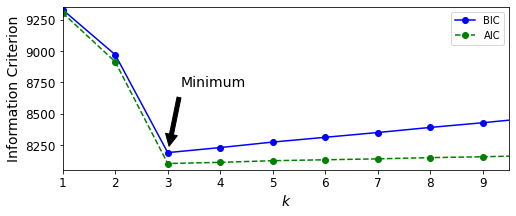

In [125]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
#save_fig("aic_bic_vs_k_plot")
plt.show()

Notice how when we ge ta lower AIC we see that it is at 3 K or 3 clusters. 

## Bayesian Gaussian Mixture Models

You can use the BayesianGaussianMixture class which is capable of giving weights equal to zero to unnecessary clusters. 

Set the number of clusters to n_components to a value that you have good reason to believe is greater than the opitmal number of clusters. And what it iwill do is remove unnecessary clusters.

In [126]:
from sklearn.mixture import BayesianGaussianMixture

In [127]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

/home/cisco/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [128]:
np.round(bgm.weights_, 2)

array([0.4 , 0.  , 0.  , 0.  , 0.39, 0.2 , 0.  , 0.  , 0.  , 0.  ])

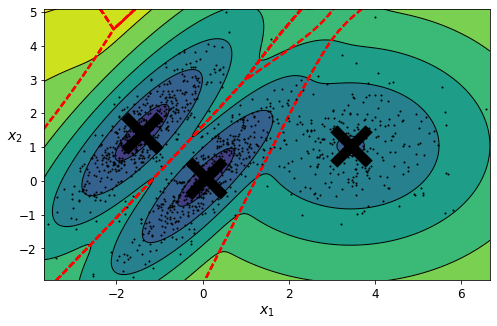

In [129]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

# Excercies

1.) How would you define clustering? Can you name a few clustering algorithms?

Clustering is a unsupervised learning technique that allows you to perform grouping on different features. It is useful when you do not have label data and want to perform a exploratory analysis. 

* KMeans
* DBScan
* Birch
* Mean-shift


2.)What are some of the main applications of the clustering algorithmns?

* Data Analysis for exploration
* Anomaly Detection
* Labeling unlabeled data
* Search engines
* Recommendation engines

3.) Describe two techniques to select the right number of clusters when using KMeans?

One method is the inertia method and the silohouette method. 

4.) What is label propagation? Why would you implement it and how?

Label propagation is when you have some label and unlabeled data. Rather than going through each instance and labeling the ones with missing labels which can be very time consuming. You can use KMeans to cluster all instances and then each clusters finds the most common label and now you propagate it to the unlabeled instances in the same cluster. 


5.) Can you name two clustering algorithms that can scale to large datsets? And two that look for regions of high density?

KMeans and Birch scale well to large datasets. DBSCAN and Mean-Shift loook for regions of high density. 

6.) Can you think of a use case where active learning would it be useful? How would you implement it?

One use case is with clustering and you are trying to do label propagation. A human can interact with this stage and provide labels for some cases when the algorithm request them. 

7.) What is the difference between anomaly detection and novelty detection?

Anomaly detection is when you try to find anomalies on a uncleaned dataset but novelty detection it is when you are finding anoamlies on cleaned data. 

Anomaly detection is when you train on a dataset with outliers to remove any outliers. In novelty detection the algorithm is trained on a dataset that is presumed to be "clean".

8.) What is a Gaussian mixture? What tasks can you use it for?

Gaussian mixture is a probabilistic model that assumes that the instances where generated from a mixture of several Gaussian distributions who parameters are unknown. 

It is useful for density estimation, clustering and anomaly detection.

9.)Can you name two techniques to find the right number of clusters when using a Gaussian mixture model?

You can use BIC and AIC to find the right number of clusters. You pick the right number of clusters that minimizes BIC and AIC. Another option is to use a Bayesian Gaussian mixture model. 


## Question 10

The classic Olivetti faces dataset contains 400 grayscale 64 x 64-pixel images of faces. Each image is flattened to a 1D vector size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split into a training set, a validation set, and a test test. Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same sumer of images per person in each set. Next, cluster the images using KMeans and ensure that you have a good number of clusters. Visualize the clusters: do you see similar faces in each clusters?





In [130]:
from sklearn.datasets import fetch_olivetti_faces

In [131]:
olivetti = fetch_olivetti_faces()

In [133]:
from sklearn.model_selection import StratifiedShuffleSplit

In [139]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [140]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

In [141]:
k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


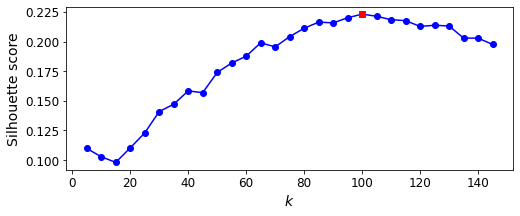

In [142]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [143]:
best_k

100

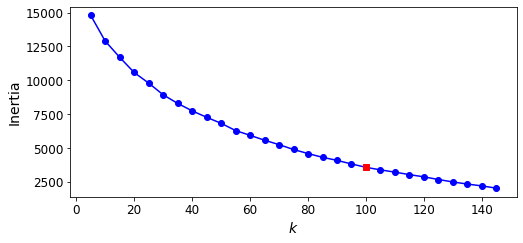

In [144]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

In [145]:
best_model = kmeans_per_k[best_index]

Cluster 0


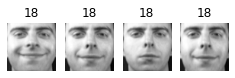

Cluster 1


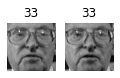

Cluster 2


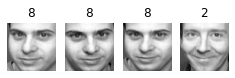

Cluster 3


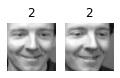

Cluster 4


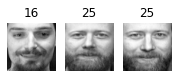

Cluster 5


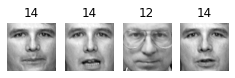

Cluster 6


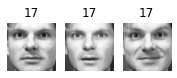

Cluster 7


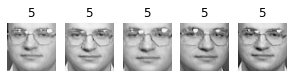

Cluster 8


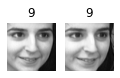

Cluster 9


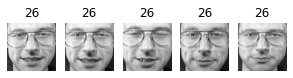

Cluster 10


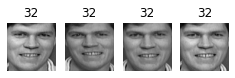

Cluster 11


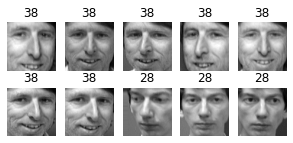

Cluster 12


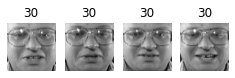

Cluster 13


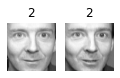

Cluster 14


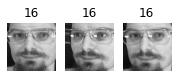

Cluster 15


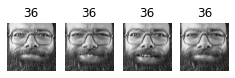

Cluster 16


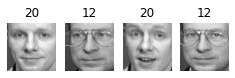

Cluster 17


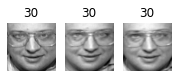

Cluster 18


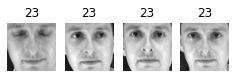

Cluster 19


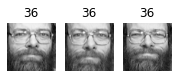

Cluster 20


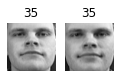

Cluster 21


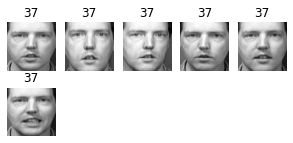

Cluster 22


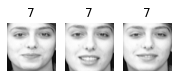

Cluster 23


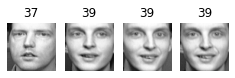

Cluster 24


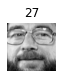

Cluster 25


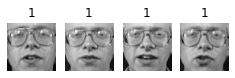

Cluster 26


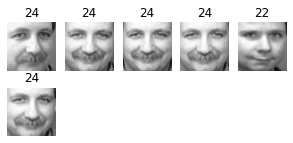

Cluster 27


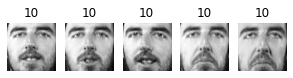

Cluster 28


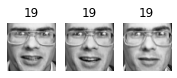

Cluster 29


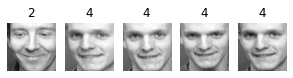

Cluster 30


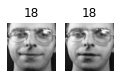

Cluster 31


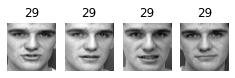

Cluster 32


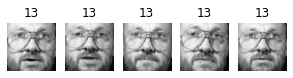

Cluster 33


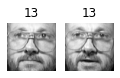

Cluster 34


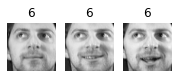

Cluster 35


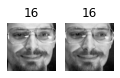

Cluster 36


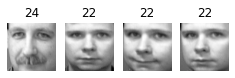

Cluster 37


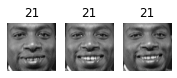

Cluster 38


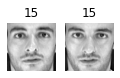

Cluster 39


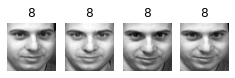

Cluster 40


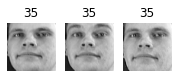

Cluster 41


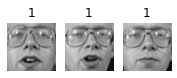

Cluster 42


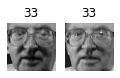

Cluster 43


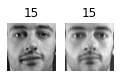

Cluster 44


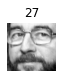

Cluster 45


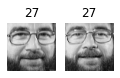

Cluster 46


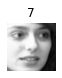

Cluster 47


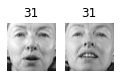

Cluster 48


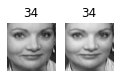

Cluster 49


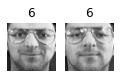

Cluster 50


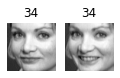

Cluster 51


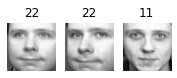

Cluster 52


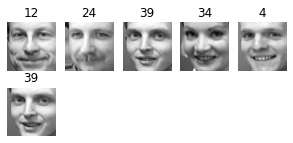

Cluster 53


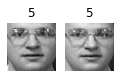

Cluster 54


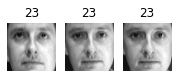

Cluster 55


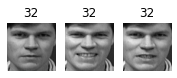

Cluster 56


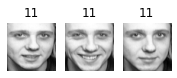

Cluster 57


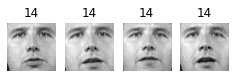

Cluster 58


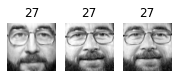

Cluster 59


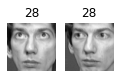

Cluster 60


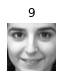

Cluster 61


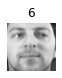

Cluster 62


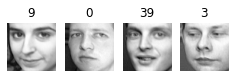

Cluster 63


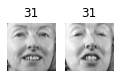

Cluster 64


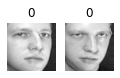

Cluster 65


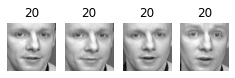

Cluster 66


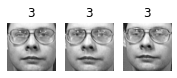

Cluster 67


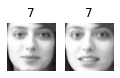

Cluster 68


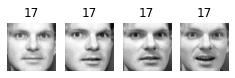

Cluster 69


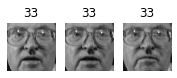

Cluster 70


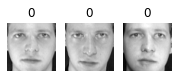

Cluster 71


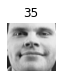

Cluster 72


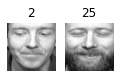

Cluster 73


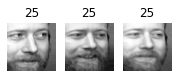

Cluster 74


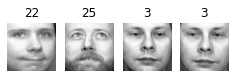

Cluster 75


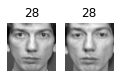

Cluster 76


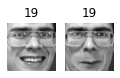

Cluster 77


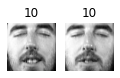

Cluster 78


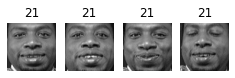

Cluster 79


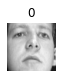

Cluster 80


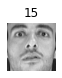

Cluster 81


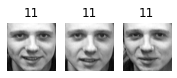

Cluster 82


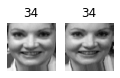

Cluster 83


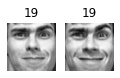

Cluster 84


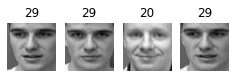

Cluster 85


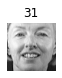

Cluster 86


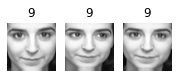

Cluster 87


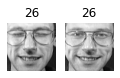

Cluster 88


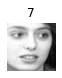

Cluster 89


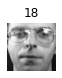

Cluster 90


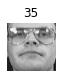

Cluster 91


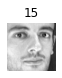

Cluster 92


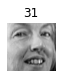

Cluster 93


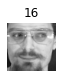

Cluster 94


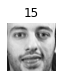

Cluster 95


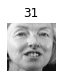

Cluster 96


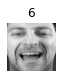

Cluster 97


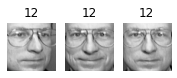

Cluster 98


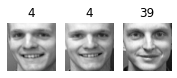

Cluster 99


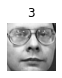

In [146]:
def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster].reshape(-1, 64, 64)
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

## Question 11

Using a the Olivetti faces dataset, train a classifier to preeict which person is represented in each picture, and evaluate it on the validation set. Next use KMeans a dimensionality reduction tool and train a classifer on the reduced set. Search for th enumber of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the feature from the reduced set to the original features always searching for the best number of clusters?


In [147]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
rnd_clf = RandomForestClassifier(n_estimators=150, random_state=42)
rnd_clf.fit(X_train_pca,y_train)
rnd_clf.score(X_valid_pca, y_valid)

0.9

In [150]:
#Use KMeans to performance dimensionality reduction
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
    
clf.score(X_valid_reduced, y_valid)

0.75

In [151]:
#Finding the right number of clusters
from sklearn.pipeline import Pipeline

for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=n_clusters)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.3375
10 0.5375
15 0.5875
20 0.6625
25 0.65
30 0.7375
35 0.725
40 0.75
45 0.6875
50 0.7
55 0.725
60 0.775
65 0.7625
70 0.7
75 0.7625
80 0.725
85 0.7125
90 0.7125
95 0.775
100 0.75
105 0.7375
110 0.75
115 0.7375
120 0.7125
125 0.75
130 0.7375
135 0.775
140 0.8
145 0.75


In [152]:
#Extending the features
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [153]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.825

## Question 12

Train a Gaussian mixture model on the Olivetti faces dataset. TO speed up the algorithm, you should reduce the dataset's dimensionality by preserving 99% vairance. Use the model to generate some new faces . Try to modify some images and see if the model can detect the anomalies.

In [154]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

In [155]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

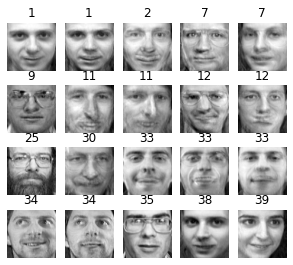

In [156]:
plot_faces(gen_faces, y_gen_faces)

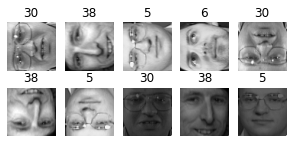

In [157]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
darkened = darkened.reshape(-1, 64*64)
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [158]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [159]:
gm.score_samples(X_bad_faces_pca)

array([-1.79997495e+07, -2.26427257e+07, -3.96415521e+07, -4.60254417e+07,
       -3.13975307e+07, -1.39330211e+07, -2.90882964e+07, -1.06298682e+08,
       -1.20931146e+08, -7.49740542e+07])

In [160]:
gm.score_samples(X_train_pca[:10])

array([1163.02021041, 1149.16682205, 1148.47710587, 1170.6760282 ,
       1088.46009625, 1075.71700517, 1075.71700952, 1088.46009   ,
       1096.42609817, 1119.68627096])

## Question 13

Some dimensionality reduction techniques can alos be used for anomaly detection. For example, take the olivetti faces dataset and reduce it with PCA, preserveing 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise, and look at their reconstruction error is. If you plot a reconstructed iamge, you will see why: it tries to reconstruct a normal face.

In [161]:
X_train_pca

array([[ 3.7807965e+00, -1.8547919e+00, -5.1440434e+00, ...,
        -1.3562302e-01, -2.1408494e-01,  6.1192263e-02],
       [ 1.0148863e+01, -1.5275424e+00, -7.6698571e-01, ...,
         1.2392706e-01, -1.3526028e-01, -2.3275560e-02],
       [-1.0015288e+01,  2.8772771e+00, -9.1987532e-01, ...,
         7.2610632e-02, -2.9636156e-03,  1.2489575e-01],
       ...,
       [ 2.4758747e+00,  2.9559710e+00,  1.2998517e+00, ...,
        -2.0903945e-02,  3.4841422e-02, -1.5431902e-01],
       [-3.2203169e+00,  5.3489809e+00,  1.3942684e+00, ...,
         5.7550076e-02, -2.2830614e-01,  1.5557621e-01],
       [-9.2287689e-01, -3.6470284e+00,  2.2608795e+00, ...,
         1.3684945e-01, -6.9124810e-02,  6.2682413e-02]], dtype=float32)

In [162]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [163]:
reconstruction_errors(pca, X_train).mean()

0.0001920535

In [164]:
reconstruction_errors(pca, X_bad_faces).mean()

0.004707354

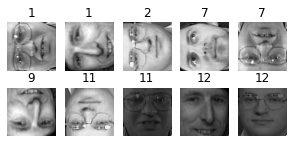

In [165]:
plot_faces(X_bad_faces, y_gen_faces)

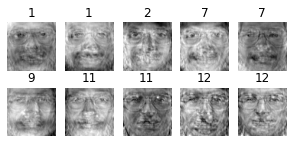

In [166]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_gen_faces)